### import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [2]:
df = pd.read_csv("data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


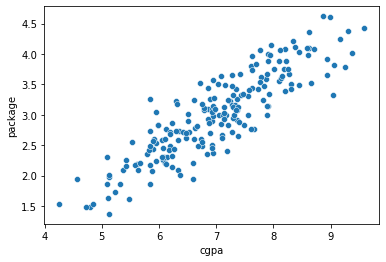

In [3]:
sns.scatterplot(x = "cgpa", y="package", data=df)
plt.show()

### split data into train test set


In [4]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((160,), (40,))

### Using sk learn LinearRegression model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = lr.predict(X_test.reshape(-1,1))

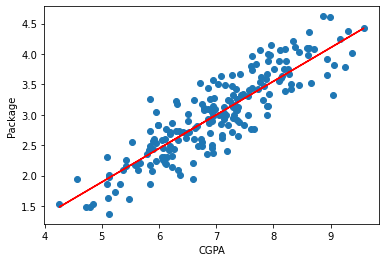

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train.reshape(-1,1)), color='red')

plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [8]:
print(f"m: {lr.coef_[0][0]}, b: {lr.intercept_[0]}")

m: 0.552503650320575, b: -0.8696365148399785


### Coding from scratch

$\hat{Y_{i}} = m*X_{i} + b
\newline where,
m = \frac{\sum \limits _{i=1} ^{n} (y_{i} - \bar{y})(x_{i} - \bar{x})}{\sum \limits _{i=1} ^{n}(x_{i} - \bar{x})^2}
\newline b = \bar{y} - m*\bar{x}$

In [9]:
class simple_lr:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i] - y_train.mean())*(X_train[i]-X_train.mean()))
            den = den + ((X_train[i]-X_train.mean())**2)
        
        self.m = num/den
        self.b = (y_train.mean()) - (self.m*X_train.mean())
        print(f"m: {self.m}, b: {self.b}")
        
    def predict(self, X_test):
        return self.m*X_test + self.b

In [10]:
slr = simple_lr()

slr.fit(X_train, y_train)

m: 0.5525036503205751, b: -0.8696365148399794


In [11]:
slr.predict(X_test)

array([2.24648407, 2.64981174, 2.50063575, 2.96473882, 3.52276751,
       2.21333385, 3.79349429, 2.84871305, 2.62771159, 2.85976312,
       2.8100378 , 2.48406064, 4.13604656, 2.7050621 , 2.93711364,
       2.51721086, 2.98683896, 3.88189488, 3.31281612, 3.20231539,
       3.1581151 , 3.61116809, 3.07523955, 2.96473882, 2.98131393,
       2.72163721, 2.87633823, 2.55036108, 1.81000619, 2.47853561,
       2.83766298, 3.49514232, 3.13601495, 3.04208933, 2.93711364,
       2.47301057, 1.96470721, 3.6885186 , 3.64984334, 3.60564305])

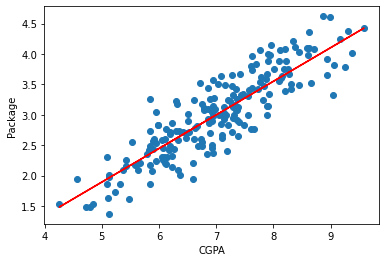

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, slr.predict(X_train.reshape(-1,1)), color='red')

plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()